In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import metrics

In [2]:
# sets matplotlib to inline
%matplotlib inline  

# importing LogisticRegression for Test and Train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,1,0.53,2,157,3,0,0,sales,low
1,0.80,1,0.86,5,262,6,0,0,sales,medium
2,0.11,1,0.88,7,272,4,0,0,sales,medium
3,0.72,1,0.87,5,223,5,0,0,sales,low
4,0.37,1,0.52,2,159,3,0,0,sales,low


In [5]:
df.shape

(14999, 10)

In [42]:
# print(df.iloc[99])
df[11362:11363]

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
11362,0.43,0,0.65,4,124,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
df.columns

Index(['satisfaction_level', 'left', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
len(object_col)

NameError: name 'object_col' is not defined

In [8]:
df.dtypes

satisfaction_level       float64
left                       int64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [9]:
df.isnull().any()

satisfaction_level       False
left                     False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [10]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,-0.388375,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
left,-0.388375,1.000000,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
last_evaluation,0.105021,0.006567,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.142970,0.023787,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.020048,0.071287,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,-0.100866,0.144822,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.154622,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.061788,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


In [11]:
def plot_factorplot(attr,labels=None):
    sns.catplot(data=df,kind='count',height=5,aspect=1.5,x=attr)

In [12]:
cat_df=df.select_dtypes(include='object')

<Figure size 1080x1080 with 0 Axes>

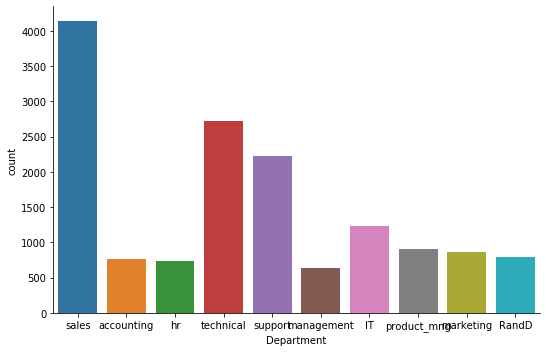

<Figure size 1080x1080 with 0 Axes>

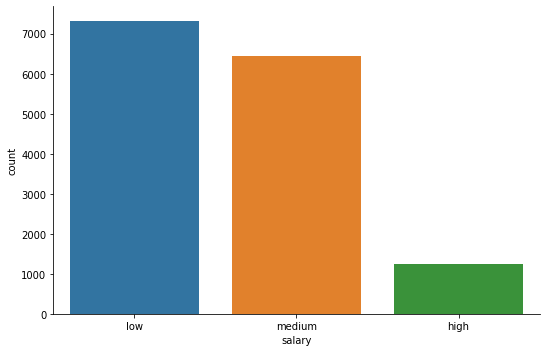

In [13]:
for i in cat_df:
    plt.figure(figsize=(15, 15))
    plot_factorplot(i) 

In [14]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,-0.388375,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
left,-0.388375,1.000000,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
last_evaluation,0.105021,0.006567,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.142970,0.023787,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.020048,0.071287,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,-0.100866,0.144822,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.154622,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.061788,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


In [15]:
#cat_col = df.select_dtypes(exclude=np.number).columns
cat_col = df.select_dtypes(exclude=np.number)
cat_col

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [16]:
for i in cat_col:
    print(df[i].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [17]:
numerical_col = df.select_dtypes(include=np.number)
numerical_col

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,1,0.53,2,157,3,0,0
1,0.80,1,0.86,5,262,6,0,0
2,0.11,1,0.88,7,272,4,0,0
3,0.72,1,0.87,5,223,5,0,0
4,0.37,1,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...,...
14994,0.40,1,0.57,2,151,3,0,0
14995,0.37,1,0.48,2,160,3,0,0
14996,0.37,1,0.53,2,143,3,0,0
14997,0.11,1,0.96,6,280,4,0,0


In [18]:
for i in numerical_col:
    print(i)

satisfaction_level
left
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
promotion_last_5years


In [19]:
df.columns.shape

(10,)

In [20]:
one_hot_categorical_variables = pd.get_dummies(cat_col)

In [21]:
one_hot_categorical_variables.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [22]:
df = pd.concat([numerical_col,one_hot_categorical_variables],sort=False,axis=1)
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,1,0.53,2,157,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,1,0.86,5,262,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,1,0.88,7,272,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,1,0.87,5,223,5,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,1,0.52,2,159,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
x = df.drop(columns='left')

In [24]:
y = df['left']

In [25]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
model = GaussianNB()
model.fit(x_train, y_train)
train_Pred = model.predict(x_train)

In [26]:
metrics.confusion_matrix(y_train,train_Pred)

array([[5111, 2863],
       [ 465, 2060]], dtype=int64)

In [27]:
metrics.accuracy_score(y_train,train_Pred)

0.6830174302314506

In [28]:
test_Pred = model.predict(x_test)

In [29]:
metrics.confusion_matrix(y_test,test_Pred)

array([[2168, 1286],
       [ 196,  850]], dtype=int64)

In [30]:
metrics.accuracy_score(y_test,test_Pred)

0.6706666666666666

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, test_Pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_Pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_Pred))
# Model MCC
print("MCC:",metrics.matthews_corrcoef(y_test, test_Pred))

Accuracy: 0.6706666666666666
Precision: 0.397940074906367
Recall: 0.8126195028680688
MCC: 0.3724336597379024


In [32]:
x = df.drop(columns='left')

In [33]:
# print(df.iloc[99])
x[11362:11363]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
11362,0.43,0.65,4,124,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
Emp1 = [0.43,0.65,4,124,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1]
Emp1

[0.43, 0.65, 4, 124, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [38]:
Emp1 = np.array([Emp1])
Emp1

array([[  0.43,   0.65,   4.  , 124.  ,   2.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ]])

In [39]:

model.predict(Emp1)

array([0], dtype=int64)

In [40]:
pred = model.predict(Emp1)

if pred[0] == 0:
    print("not leaving")
else:
    print("leaving")

not leaving


In [43]:
# print(df.iloc[99])
x[0:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [44]:
Emp1 = [0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0]
Emp1

[0.38, 0.53, 2, 157, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [45]:
Emp1 = np.array([Emp1])
Emp1

array([[  0.38,   0.53,   2.  , 157.  ,   3.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   1.  ,   0.  ]])

In [46]:
model.predict(Emp1)

array([1], dtype=int64)

In [47]:
pred = model.predict(Emp1)

if pred[0] == 0:
    print("not leaving")
else:
    print("leaving")

leaving
